## Data Visualization

In [1]:
%load_ext watermark
%watermark -a "Emily Schoof" -d -t -v -p numpy,pandas,matplotlib,seaborn,scipy

Emily Schoof 2019-08-22 15:19:03 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
seaborn 0.9.0
scipy 1.2.1


In [2]:
# Import data
%store -r movie_df
revenue_graphed = movie_df.copy()
revenue_graphed.shape

(4641, 10)

### Distribution of Revenue in Dataframe

In [3]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# Fill NaN values with mean
revenue_graphed['revenue'] = revenue_graphed['revenue'].fillna(revenue_graphed['revenue'].mean())

In [5]:
# Create an Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
   
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

In [6]:
# Seed the random number generator
np.random.seed(42)

# Define revenue
revenue = revenue_graphed['revenue']

# Calculate ecdf in dataset
x_revenue, y_revenue = ecdf(revenue)

# Compute the theoretical CDF 
cdf_mean = np.mean(revenue)
cdf_std = np.std(revenue)

# Simulate a random sample with the same distribution and size of 10,000
cdf_samples = np.random.normal(cdf_mean, cdf_std, size=10000)

# Calculate ecdf of random sample
x_norm, y_norm = ecdf(cdf_samples)

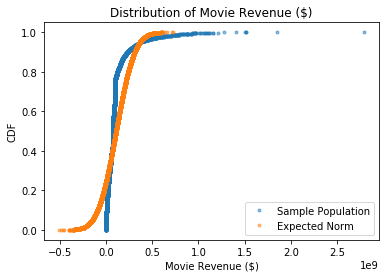

'The sample(n=4641) movie revenue $109416849.35 with a standard deviation of $156645219.98.'

In [7]:
# Plot both ECDFs on same the figure
fig = plt.plot(x_revenue, y_revenue, marker='.', linestyle='none', alpha=0.5)
fig = plt.plot(x_norm, y_norm, marker='.', linestyle='none', alpha=0.5)

# Label figure
fig = plt.xlabel('Movie Revenue ($)')
fig = plt.ylabel('CDF')
fig = plt.legend(('Sample Population', 'Expected Norm'))
fig = plt.title('Distribution of Movie Revenue ($)')

# Save plots
plt.show()
'The sample(n=' + str(len(revenue)) + ') movie revenue $' + str(round(np.mean(revenue), 2)) + ' with a standard deviation of $' + str(round(np.std(revenue), 2)) + '.'

*Observations*: The overall distribution of Movie Revenue ($) is not normally distributed based on an ECDF assessment. This is, largely, to be expected since movie revenue is likely to have increased over time (due to inflation and additional consumer engagement). Luckily, under the Central Limit Theorem (CLT), this target variable can be treated as normally distributed since the sample size (n=4641) is greater than 30.

### Plot Movie Revenue Over Time

In [8]:
# Create a time subdf
revenue_over_time = revenue_graphed[['revenue', 'release_date_dt', 'runtime']]

# Add column for just years
years = []
for date in revenue_over_time['release_date_dt']:
    year = date.year
    years.append(year)
    
# Add column for just day of release
months = []
for date in revenue_over_time['release_date_dt']:
    month = date.month
    months.append(month)

# Add column for just day of release
days = []
for date in revenue_over_time['release_date_dt']:
    day = date.weekday()
    days.append(day)

# Add to Dataframe
revenue_over_time['release_day'] = pd.Series(days, index=np.arange(0, 4641))
revenue_over_time['release_month'] = pd.Series(months, index=np.arange(0, 4641))
revenue_over_time['release_year'] = pd.Series(years, index=np.arange(0, 4641))
revenue_over_time['count'] = 1
revenue_over_time.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,revenue,release_date_dt,runtime,release_day,release_month,release_year,count
0,2.787965e+09,2009-12-10,162.0,3,12,2009,1
1,1.845034e+09,1997-11-18,194.0,1,11,1997,1
2,1.519558e+09,2012-04-25,143.0,2,4,2012,1
3,1.513529e+09,2015-06-09,124.0,1,6,2015,1
4,1.506249e+09,2015-04-01,137.0,2,4,2015,1


In [9]:
# Groupby Year
mean_revenue_by_year = revenue_over_time[['revenue', 'release_year']].groupby('release_year', as_index=False).mean()
mean_revenue_by_year.head()

,release_year,revenue
0,1969,4.283333e+07
1,1970,3.491149e+07
2,1971,4.101892e+07
3,1972,5.769750e+07
4,1973,1.066211e+08


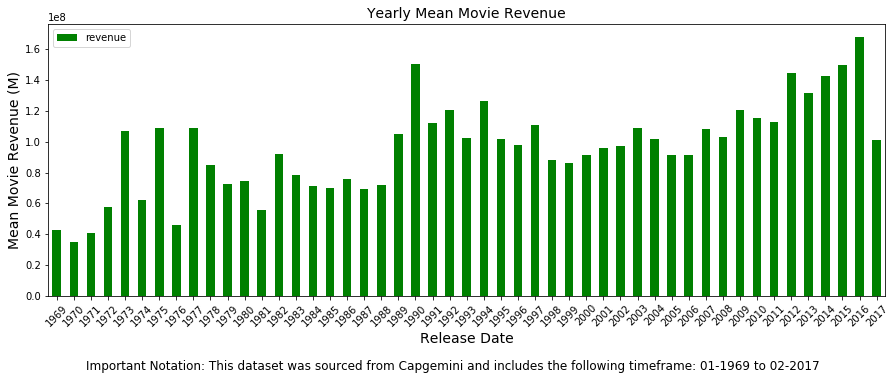

In [10]:
# Plot Revenue over Time (year)
mean_revenue_by_year.plot(x='release_year', y='revenue', kind='bar', figsize=(15,5), color='g')
_=plt.xticks(rotation = 45)
_=plt.title('Yearly Mean Movie Revenue', fontsize=14)
_=plt.xlabel('Release Date', fontsize=14)
_=plt.ylabel('Mean Movie Revenue (M)', fontsize=14)
txt = 'Important Notation: This dataset was sourced from Capgemini and includes the following timeframe: 01-1969 to 02-2017'
plt.figtext(.5, -.08, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [11]:
# Groupby Month
mean_revenue_by_release_month = revenue_over_time[['revenue', 'release_month']].groupby('release_month', as_index=False).mean()
mean_revenue_by_release_month.head()

,release_month,revenue
0,1,6.815592e+07
1,2,8.085470e+07
2,3,1.027029e+08
3,4,1.040797e+08
4,5,1.610178e+08


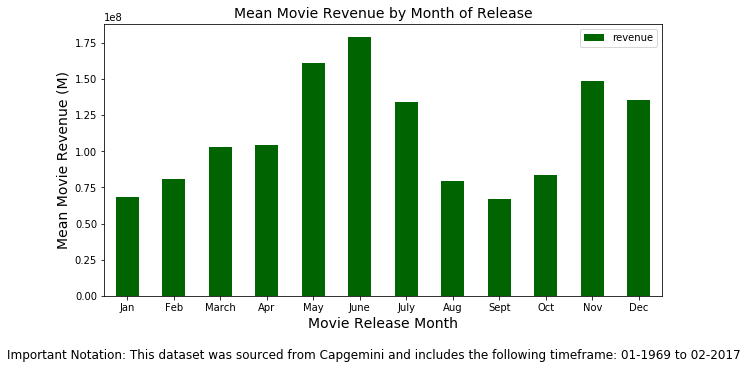

In [12]:
# Plot Revenue by Release Month
mean_revenue_by_release_month.plot(x='release_month', y='revenue', kind='bar', figsize=(10,5), color='darkgreen')
labels = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
_=plt.xticks(np.arange(0,12), labels=labels, rotation=0)
_=plt.title('Mean Movie Revenue by Month of Release', fontsize=14)
_=plt.xlabel('Movie Release Month', fontsize=14)
_=plt.ylabel('Mean Movie Revenue (M)', fontsize=14)
txt = 'Important Notation: This dataset was sourced from Capgemini and includes the following timeframe: 01-1969 to 02-2017'
plt.figtext(.5, -.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [13]:
# Groupby Day
mean_revenue_by_dow = revenue_over_time[['revenue', 'release_day']].groupby('release_day', as_index=False).sum()
mean_revenue_by_dow

,release_day,revenue
0,0,2.632518e+10
1,1,5.096601e+10
2,2,1.226706e+11
3,3,1.026084e+11
4,4,1.625033e+11
5,5,2.411490e+10
6,6,1.861527e+10


In [14]:
mean_revenue_by_dow['day_value'] = pd.Series(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
mean_revenue_by_dow

,release_day,revenue,day_value
0,0,2.632518e+10,Mon
1,1,5.096601e+10,Tues
2,2,1.226706e+11,Wed
3,3,1.026084e+11,Thurs
4,4,1.625033e+11,Fri
5,5,2.411490e+10,Sat
6,6,1.861527e+10,Sun


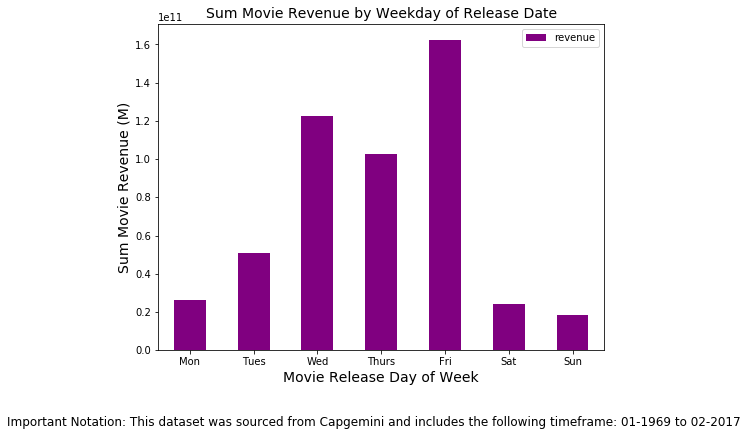

In [15]:
# Plot Revenue by Release Day of Week
mean_revenue_by_dow.plot(x='release_day', y='revenue', kind='bar', figsize=(8,6), color='purple')
_=plt.xticks(np.arange(0,7), labels=mean_revenue_by_dow['day_value'].values, rotation=0)
_=plt.title('Sum Movie Revenue by Weekday of Release Date', fontsize=14)
_=plt.xlabel('Movie Release Day of Week', fontsize=14)
_=plt.ylabel('Sum Movie Revenue (M)', fontsize=14)
txt = 'Important Notation: This dataset was sourced from Capgemini and includes the following timeframe: 01-1969 to 02-2017'
plt.figtext(.5, -.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [16]:
# Groupby Quantile
top_80 = np.percentile(revenue_over_time.revenue.sort_values(ascending=False), 80)

In [17]:
def top_revenue_movies(x):
    """ Select Movies in 80th Percentile """
    if x > top_80:
        return 1
    else:
        return 2

In [18]:
revenue_over_time['top_80'] = revenue_over_time.revenue.apply(top_revenue_movies)
revenue_over_time.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,revenue,release_date_dt,runtime,release_day,release_month,release_year,count,top_80
0,2.787965e+09,2009-12-10,162.0,3,12,2009,1,1
1,1.845034e+09,1997-11-18,194.0,1,11,1997,1,1
2,1.519558e+09,2012-04-25,143.0,2,4,2012,1,1
3,1.513529e+09,2015-06-09,124.0,1,6,2015,1,1
4,1.506249e+09,2015-04-01,137.0,2,4,2015,1,1


In [19]:
# Select 80th percentile data
top_80_rev_movies = revenue_over_time.loc[revenue_over_time.top_80 == 1]
top_80_rev_movies.head()

,revenue,release_date_dt,runtime,release_day,release_month,release_year,count,top_80
0,2.787965e+09,2009-12-10,162.0,3,12,2009,1,1
1,1.845034e+09,1997-11-18,194.0,1,11,1997,1,1
2,1.519558e+09,2012-04-25,143.0,2,4,2012,1,1
3,1.513529e+09,2015-06-09,124.0,1,6,2015,1,1
4,1.506249e+09,2015-04-01,137.0,2,4,2015,1,1


In [20]:
# Groupby Day
top_80_mean_revenue_by_dow = top_80_rev_movies[['revenue', 'release_day']].groupby('release_day', as_index=False).sum()
top_80_mean_revenue_by_dow['day_value'] = pd.Series(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
top_80_mean_revenue_by_dow.head()

,release_day,revenue,day_value
0,0,1.686092e+10,Mon
1,1,3.552561e+10,Tues
2,2,9.432617e+10,Wed
3,3,6.420634e+10,Thurs
4,4,6.773676e+10,Fri


In [21]:
# Mean and STD
top_80_mean = np.mean(top_80_mean_revenue_by_dow.revenue)
top_80_std = np.std(top_80_mean_revenue_by_dow.revenue)

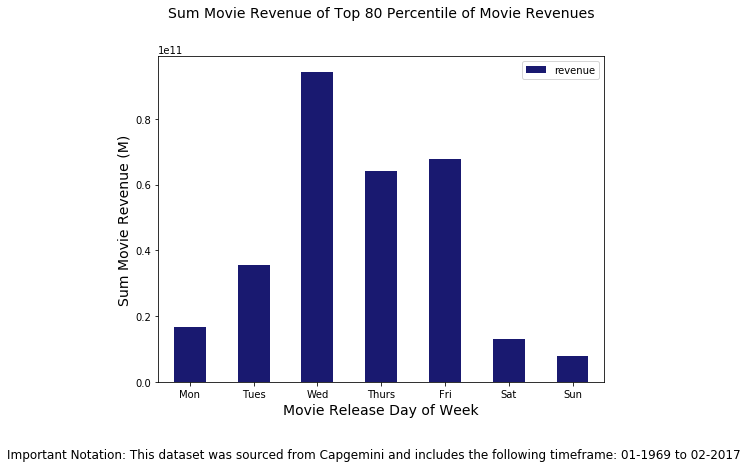

In [22]:
# Plot Revenue by Release Day of Week
top_80_mean_revenue_by_dow.plot(x='release_day', y='revenue', kind='bar', figsize=(8,6), color='midnightblue')
_=plt.xticks(np.arange(0,7), labels=mean_revenue_by_dow['day_value'].values, rotation=0)
_=plt.title('Sum Movie Revenue of Top 80 Percentile of Movie Revenues', fontsize=14, y=1.1)
_=plt.xlabel('Movie Release Day of Week', fontsize=14)
_=plt.ylabel('Sum Movie Revenue (M)', fontsize=14)
txt = 'Important Notation: This dataset was sourced from Capgemini and includes the following timeframe: 01-1969 to 02-2017'
plt.figtext(.5, -.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Feature Relationships to Target Variable and Each Other

In [23]:
# Create a time subdf
revenue_by_runtime = revenue_over_time[['revenue', 'runtime', 'release_year']]

# Groupby runtime
revenue_by_runtime = revenue_by_runtime[['revenue', 'runtime']].groupby('runtime', as_index=False).mean()
revenue_by_runtime.head(2)

,runtime,revenue
0,0.0,9.156405e+07
1,14.0,1.012778e+08


In [24]:
max(revenue_by_runtime.runtime)

338.0

In [25]:
len(str(revenue_by_runtime.runtime.iloc[1]))

4

In [26]:
for idx, val in enumerate(revenue_by_runtime['runtime']):
    new_v = str(val)
    if len(new_v) < 5:
        new_v = int(new_v[0]) * 10
    else:
        new_v = int(new_v[:2]) * 10
    revenue_by_runtime['runtime'].iloc[idx] =  new_v 

In [27]:
revenue_by_runtime.head()

,runtime,revenue
0,0.0,9.156405e+07
1,10.0,1.012778e+08
2,40.0,4.074023e+06
3,40.0,7.518876e+06
4,40.0,2.126853e+07


In [28]:
# Groupby runtime (again)
revenue_by_runtime = revenue_by_runtime.groupby('runtime', as_index=False).mean()
revenue_by_runtime.head()

,runtime,revenue
0,0.0,9.156405e+07
1,10.0,1.012778e+08
2,40.0,2.673520e+07
3,50.0,8.767856e+07
4,60.0,7.058575e+07


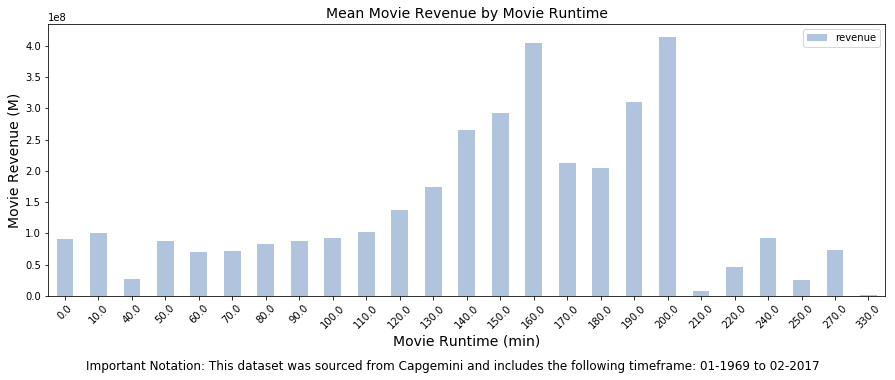

In [29]:
# Plot Revenue by Movie Runtime
revenue_by_runtime.plot(x='runtime', y='revenue', kind='bar', figsize=(15,5), color='lightsteelblue')
_=plt.xticks(rotation=45)
_=plt.title('Mean Movie Revenue by Movie Runtime', fontsize = 14)
_=plt.xlabel('Movie Runtime (min)', fontsize = 14)
_=plt.ylabel('Movie Revenue (M)', fontsize = 14)
txt = 'Important Notation: This dataset was sourced from Capgemini and includes the following timeframe: 01-1969 to 02-2017'
plt.figtext(.5, -.08, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [30]:
# Assess movie runtime by date
runtime_by_date = revenue_over_time[['runtime', 'release_year']]

# Select all non-zero values of runtime
runtime_by_date = runtime_by_date[runtime_by_date.runtime != 0.0]

# Groupby Year
runtime_by_date = runtime_by_date[['runtime', 'release_year']].groupby('release_year', as_index=False).mean()
runtime_by_date.head()

,release_year,runtime
0,1969,126.800000
1,1970,129.166667
2,1971,108.300000
3,1972,116.555556
4,1973,109.444444


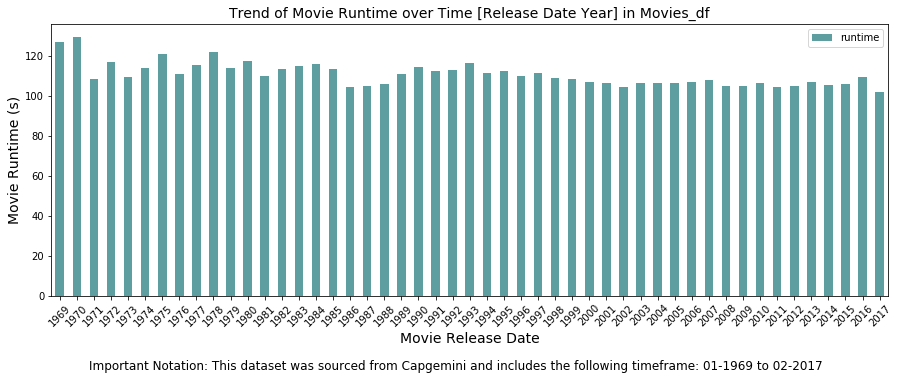

In [31]:
# Plot Revenue by Movie Runtime
runtime_by_date.plot(x='release_year', y='runtime', kind='bar', figsize=(15,5), color='cadetblue')
_=plt.xticks(rotation=45)
_=plt.title('Trend of Movie Runtime over Time [Release Date Year] in Movies_df', fontsize = 14)
_=plt.ylabel('Movie Runtime (s)', fontsize = 14)
_=plt.xlabel('Movie Release Date', fontsize = 14)
txt = 'Important Notation: This dataset was sourced from Capgemini and includes the following timeframe: 01-1969 to 02-2017'
plt.figtext(.5, -.08, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

*Based off of the presentation of the data, a runtime of '0' can arguably be replaced with the column mean.*

In [32]:
# Replace runtime 0 with runtime column mean in movie_df
movie_df.loc[(movie_df.runtime == 0.0), 'runtime'] = movie_df.runtime.mean()

In [33]:
# Test Output
movie_df.head()

,title,revenue,genres,keywords,original_language,production_companies,production_countries,runtime,spoken_languages,release_date_dt
0,Avatar,2.787965e+09,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",2009-12-10
1,Titanic,1.845034e+09,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1997-11-18
2,The Avengers,1.519558e+09,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2012-04-25
3,Jurassic World,1.513529e+09,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2015-06-09
4,Furious 7,1.506249e+09,"[{""id"": 28, ""name"": ""Action""}]","[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2015-04-01


In [34]:
movie_df_cleaner = movie_df.copy()
%store movie_df_cleaner

Stored 'movie_df_cleaner' (DataFrame)
